# Finding the Best Markets to Advertise in

This project is about helping an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, and it's always wise to explore available data since it's cheaper. One good candidate is the data from freeCodeCamp's [2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular [Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
# read in the file
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)
survey.head(5)

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  BootcampRecommend  ChildrenNumber                 CityPopulation  CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops       CommuteTime            CountryCitizen               CountryLive              EmploymentField EmploymentFieldOther                  EmploymentStatus EmploymentStatusOther  ExpectedEarning  FinanciallySupporting  FirstDevJob  Gender GenderOther  HasChildren  HasDebt  HasFinancialDependents  HasHighSpdInternet  HasHomeMortgage  HasServedInMilitary  HasStudentDebt  HomeMortgageOwe  HoursLearning                              ID.x                              ID.y   Income  IsEthnicMinority  IsReceiveDisabilitiesBenefits  IsSoftwareDev  \
0  27.0               0.0             NaN                NaN          NaN                NaN             NaN            more than 1 million                   NaN                   NaN           NaN               NaN               NaN                  NaN              NaN                  NaN            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 NaN  15 to 29 minutes                    Canada                    Canada  software development and IT                  NaN                Employed for wages                   NaN              NaN                    NaN          NaN  female         NaN          NaN      1.0                     0.0                 1.0              0.0                  0.0             0.0              NaN           15.0  02d9465b21e8bd09374b0066fb2d5614  eb78c1c3ac6cd9052aec557065070fbf      NaN               NaN                            0.0            0.0   
1  34.0               0.0             NaN                NaN          NaN                NaN             NaN              less than 100,000                   NaN                   NaN           NaN               NaN               NaN                  NaN              NaN                  NaN            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 NaN               NaN  United States of America  United States of America                          NaN                  NaN  Not working but looking for work                   NaN          35000.0                    NaN          NaN    male         NaN          NaN      1.0                     0.0                 1.0              0.0                  0.0             1.0              NaN           10.0  5bfef9ecb211ec4f518cfc1d2a6f3e0c  21db37adb60cdcafadfa7dca1b13b6b1      NaN               0.0                            0.0            0.0   
2  21.0               0.0             NaN                NaN          NaN                NaN             NaN            more than 1 million                   NaN                   NaN           NaN               NaN               NaN                  1.0              NaN                  1.0            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 NaN  15 to 29 minutes  United States of America  United States of America  software development and IT                  NaN                Employed for wages                   NaN          70000.0                    NaN          NaN    male         NaN          NaN      0.0                     0.0                 1.0              NaN                  0.0             NaN              NaN           25.0  14f1863afa9c7de488050b82eb3edd96  21ba173828fbe9e27ccebaf4d5166a55  13000.0               1.0                            0.0            0.0   
3  26.0             

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we provide. We'd like to know:

- Location of new coders.
- Locations with the greatest number of new coders.
- Amount of money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

### Frequency Distribution(%) for JobRoleInterest Column

In [2]:
job_freq = survey['JobRoleInterest'].value_counts(normalize=True)*100

df = job_freq.rename_axis('JobRoleInterest').reset_index(name='Percentages')
print(df.head(10))
print(df.tail(10))

                                     JobRoleInterest  Percentages
0                           Full-Stack Web Developer    11.770595
1                            Front-End Web Developer     6.435927
2                                     Data Scientist     2.173913
3                             Back-End Web Developer     2.030892
4                                   Mobile Developer     1.673341
5                                     Game Developer     1.630435
6                               Information Security     1.315789
7  Full-Stack Web Developer,   Front-End Web Deve...     0.915332
8    Front-End Web Developer, Full-Stack Web Deve...     0.800915
9                                    Product Manager     0.786613
                                        JobRoleInterest  Percentages
3203    Front-End Web Developer,   User Experience D...     0.014302
3204  Data Engineer, Back-End Web Developer,   DevOp...     0.014302
3205    Front-End Web Developer,   Product Manager, ...     0.01430

There are more than 3000 different entries for JobRoleInterest, however, majority of them have more than one subject. The focus of our courses is on web and mobile development so we will need to find out how many users are interested in web and mobile development.

### Isolating Rows with Interest in Web and Mobile Development

In [3]:
regex = []
web_mobile = survey[survey['JobRoleInterest'].str.match('.*Web Developer.*|.*Mobile Developer.*',na=False)]
web_mobile['JobRoleInterest'].value_counts().head(10)

Full-Stack Web Developer                                                       823
  Front-End Web Developer                                                      450
Back-End Web Developer                                                         142
  Mobile Developer                                                             117
Full-Stack Web Developer,   Front-End Web Developer                             64
  Front-End Web Developer, Full-Stack Web Developer                             56
  User Experience Designer,   Front-End Web Developer                           43
  Front-End Web Developer, Back-End Web Developer, Full-Stack Web Developer     39
Back-End Web Developer, Full-Stack Web Developer,   Front-End Web Developer     36
Back-End Web Developer,   Front-End Web Developer, Full-Stack Web Developer     36
Name: JobRoleInterest, dtype: int64

### % of respondents interested in web and mobile development

In [4]:
# Total amount of respondents interested in web or mobile development
total_respondents_wm = web_mobile['JobRoleInterest'].value_counts().sum()
total_respondents_wm

6030

In [5]:
# Total amount of respondents in the dataset
total_respondents = survey['JobRoleInterest'].value_counts().sum()
total_respondents

6992

In [6]:
# Percentage of respondents interested in web or mobile development
total_respondents_wm/total_respondents*100

86.24141876430205

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline
total_respondents_notwm = total_respondents - total_respondents_wm
df = pd.DataFrame({'Percentage': [total_respondents_wm*100/total_respondents, total_respondents_notwm*100/total_respondents]}
                  ,index=['Web and Mobile','Others'])
df

Percentage
Web and Mobile   86.241419
Others           13.758581

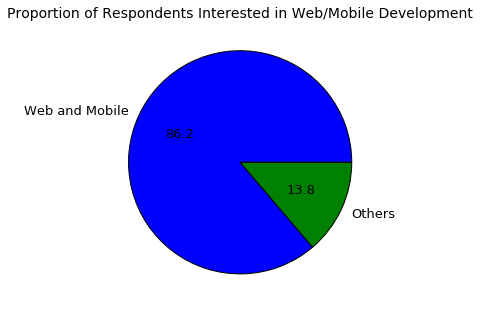

In [8]:
df.plot.pie(y='Percentage',figsize=(5,5),legend=None, autopct='%.1f',fontsize=13)
plt.ylabel('')
plt.title('Proportion of Respondents Interested in Web/Mobile Development', fontsize=14)

Overwhemling, majority of our respondents (86%) are interested in web or mobile development. Note that this figure also include respondents with interest in **both** web and mobile development.

Now we will find out the proportion of respondents with interests in more than one subjects.

### Respondents with Interests in More Than One Subject

In [9]:
# Find the amount of respondents with interest in more than one subject
more_than_one = survey[survey['JobRoleInterest'].str.contains(',', na=False)]
more_than_one['JobRoleInterest'].value_counts().head(10)

Full-Stack Web Developer,   Front-End Web Developer                            64
  Front-End Web Developer, Full-Stack Web Developer                            56
  User Experience Designer,   Front-End Web Developer                          43
  Front-End Web Developer, Back-End Web Developer, Full-Stack Web Developer    39
Back-End Web Developer, Full-Stack Web Developer,   Front-End Web Developer    36
Back-End Web Developer,   Front-End Web Developer, Full-Stack Web Developer    36
Full-Stack Web Developer,   Front-End Web Developer, Back-End Web Developer    31
  Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer    30
  Front-End Web Developer,   User Experience Designer                          29
Full-Stack Web Developer,   Mobile Developer                                   29
Name: JobRoleInterest, dtype: int64

In [10]:
total_more_than_one = more_than_one['JobRoleInterest'].value_counts().sum()
total_more_than_one

4779

In [11]:
df1 = pd.DataFrame({'Percentage': [total_more_than_one/total_respondents*100, (total_respondents-total_more_than_one)*100/total_respondents]}
                  ,index=['More than one subject','Only one subject'])
df1

Percentage
More than one subject   68.349542
Only one subject        31.650458

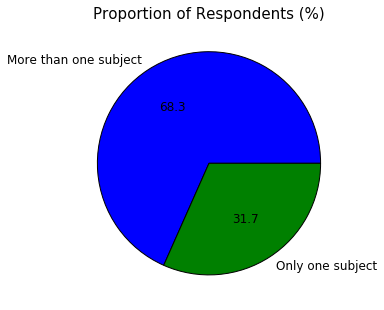

In [12]:
df1.plot.pie(y='Percentage',figsize=(5,5),legend=None, autopct='%.1f',fontsize=12)
plt.ylabel('')
plt.title('Proportion of Respondents (%)',fontsize=15)



Our analysis shows that only 31.7% of the participants have a clear idea about which area of programming they'd like to work in, while the majority of students have mixed interests. Since our platform offers various subjects so the fact that new coders have mixed interest might actually be beneficial for our company.

The figures from our analysis strong suggests that the sample is representative of our population of interest. Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. 

We can start with finding out by the following:
- the location of new coders
- the densities of new coders for each location.

## Location

The data set provides information about the location of each respondent at a country level with two variables (*CountryCitizen* and *CountryLive*). 
The CountryCitizen variable describes the country of origin for each respondent, and the CountryLive variable describes what country each respondent lives in (which may be different than the origin country).

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. Simply put, we're interested where people are located rather than where they were born.

Since the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

### Drop Rows with Null Values in JobRoleInterest Column
To ensure we're working with a representative sample, we need to drop all the rows where participants didn't answer what role they are interested in. 

In [13]:
survey_clean = survey[survey['JobRoleInterest'].notnull()].copy()

### Frequency Table for CountryLive Variable

In [14]:
abs_countrylive = survey_clean['CountryLive'].value_counts()
abs_countrylive

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Argentina   

There are 137 countries in the CountryLive variables. Overwhelmingly, majority of the respondents live in USA followed by India and United Kingdom respectively, representing the top 3 countries.

### Proportion (%) of Countries in CountryLive Variable

In [15]:
# Frequency table with relative frequencies
rel_countrylive = survey_clean['CountryLive'].value_counts(normalize=True)*100
# Put into a DataFrame to make it more readable
countrylive = pd.DataFrame(data = {'Absolute frequency': abs_countrylive, 
                     'Percentage': rel_countrylive}
            )
countrylive.sort_values('Percentage', ascending=False).head(10)

Absolute frequency  Percentage
United States of America                3125   45.700497
India                                    528    7.721556
United Kingdom                           315    4.606610
Canada                                   260    3.802281
Poland                                   131    1.915765
Brazil                                   129    1.886517
Germany                                  125    1.828020
Australia                                112    1.637906
Russia                                   102    1.491664
Ukraine                                   89    1.301550

USA represents the majority with 45.7% while India came second. With almost half of the total respondent, USA  definitely seems like a good option to focus our advertising startegy on. However, India is just about 3% more than United Kingdom which is the the 3rd place and less than 4% more than Canada. It is advisable that we go more in depth with our anlaysis before deciding which country we should target along with USA.

We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Spending on Learning

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for further analysis.
- The courses on our platform are written in English, and English is an official language in all these four countries. The more people that know English, the more likely our advertisement will have a bigger impact.


### New Column for Money Spent per Month
We need to create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey). 

The MoneyforLearning column represent the total amount of money our respondents have spent on learning and MonthsProgramming column represnts the number of months they have spent on learning. We will divide the MoneyforLearning column with MonthsProgramming column:

In [16]:
# Checking the values for MonthsPrgramming
survey_clean['MonthsProgramming'].value_counts().sort_index()

0.0      235
1.0      767
2.0      669
3.0      637
4.0      367
5.0      279
6.0      654
7.0      124
8.0      195
9.0      102
10.0     144
11.0      39
12.0     616
13.0      36
14.0      76
15.0      70
16.0      58
17.0      20
18.0     160
19.0       7
20.0      92
21.0       9
22.0       5
23.0       4
24.0     422
25.0      12
26.0      17
27.0       8
28.0      13
29.0       6
        ... 
73.0       1
75.0       2
80.0       3
83.0       1
84.0      11
86.0       1
89.0       1
96.0       8
100.0      8
105.0      1
108.0      2
111.0      1
113.0      1
120.0     13
124.0      1
144.0      5
156.0      2
171.0      1
180.0      1
190.0      1
198.0      1
200.0      6
240.0      3
264.0      1
300.0      1
360.0      5
370.0      1
408.0      1
480.0      2
744.0      4
Name: MonthsProgramming, Length: 91, dtype: int64

There are 235 respondents answered 0 months for the column. It could be that they had just started when they completed the survey. We need to avoid dividing by 0, replace all the values of 0 with 1.

In [17]:
# Replacing 0 with 1
survey_clean['MonthsProgramming'].replace(0,1, inplace=True)
survey_clean['MonthsProgramming'].value_counts().sort_index().head(5)

1.0    1002
2.0     669
3.0     637
4.0     367
5.0     279
Name: MonthsProgramming, dtype: int64

In [18]:
survey_clean['MoneyForLearning']

1           80.0
2         1000.0
3            0.0
4            0.0
6            0.0
9          100.0
11           0.0
13           NaN
14           NaN
15           0.0
16         200.0
18         500.0
19         500.0
21         300.0
22        4000.0
23         200.0
28          29.0
29         300.0
30         200.0
31           0.0
32         600.0
33         500.0
34           NaN
35           0.0
37           NaN
40         200.0
41           0.0
42         100.0
43           0.0
52           0.0
          ...   
18080       50.0
18081        NaN
18088      364.0
18089        0.0
18090        0.0
18093     1000.0
18097        0.0
18098       22.0
18099     1000.0
18107      550.0
18111     1000.0
18112        0.0
18113        0.0
18118        0.0
18125      200.0
18129        0.0
18130        0.0
18131      100.0
18151        0.0
18153        0.0
18154      297.0
18155        0.0
18156     1000.0
18157        0.0
18160      100.0
18161        0.0
18162        0.0
18163        0

In [19]:
# Create new column 'MoneySpentPerMonth'
survey_clean['MoneySpentPerMonth'] = survey_clean['MoneyForLearning'] / survey_clean['MonthsProgramming']

# Find out how many null values are in the new column
survey_clean['MoneySpentPerMonth'].isnull().sum()

675

In [20]:
# Remove rows with null values
survey_clean = survey_clean[survey_clean['MoneySpentPerMonth'].notnull()].copy()
# Check the number of null values
survey_clean['MoneySpentPerMonth'].isnull().sum()

0

In [21]:
# Check the number of null values in CountryLive column
survey_clean['CountryLive'].isnull().sum()

105

In [22]:
# Remove rows with null values in CountryLive column
survey_clean = survey_clean[survey_clean['CountryLive'].notnull()].copy()
# Check the number of null values
survey_clean['CountryLive'].isnull().sum()

0

### Money Spent per Country

We will now group the remaining data by the CountryLive column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [23]:
mean_by_country = survey_clean.groupby('CountryLive').mean()
# Display rows for USA , India, United Kingdom and Canada
mean_by_country['MoneySpentPerMonth'][['United States of America','India', 'United Kingdom','Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentPerMonth, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we would expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Extreme Outliers

We'll generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



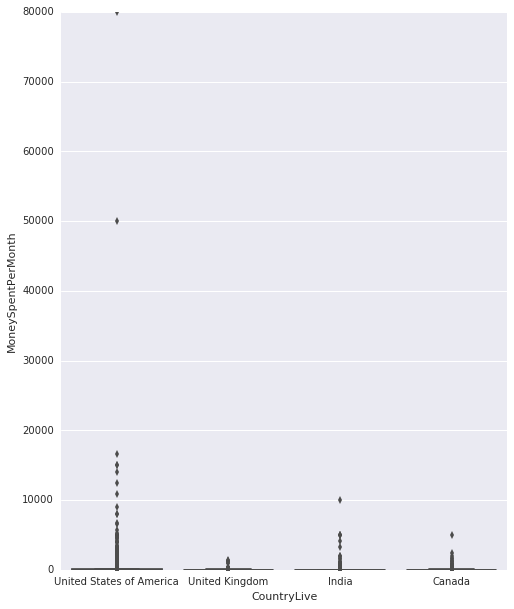

In [24]:
import seaborn as sns
box_plot = survey_clean[survey_clean['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
plt.figure(figsize=(8,10))
ax = sns.boxplot(x="CountryLive", y="MoneySpentPerMonth", data=box_plot)


For India, it seems like there are some outliers on the top end. One of the possible reasons is those respondent have attended bootcamps which tends to be more expensive than other platforms of learning. We can check if those respondents have attended bootcamps or not. 

### India

In [25]:
india_outliers = survey_clean[(survey_clean['CountryLive'] == 'India') & 
                              (survey_clean['MoneySpentPerMonth'] >3000)]
india_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  BootcampRecommend  ChildrenNumber                 CityPopulation  CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops       CommuteTime CountryCitizen CountryLive              EmploymentField EmploymentFieldOther                      EmploymentStatus EmploymentStatusOther  ExpectedEarning  FinanciallySupporting  FirstDevJob Gender GenderOther  HasChildren  HasDebt  HasFinancialDependents  HasHighSpdInternet  HasHomeMortgage  HasServedInMilitary  HasStudentDebt  HomeMortgageOwe  HoursLearning                              ID.x                              ID.y    Income  IsEthnicMinority  IsReceiveDisabilitiesBenefits  IsSoftwareDev  IsUnderEmployed  \
1728   24.0               0.0             NaN                NaN          NaN                NaN             NaN  between 100,000 and 1 million                   NaN                   NaN           NaN               1.0               NaN                  NaN              NaN                  NaN            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 NaN               NaN          India       India                          NaN                  NaN    A stay-at-home parent or homemaker                   NaN          70000.0                    NaN          NaN   male         NaN          NaN      0.0                     0.0                 1.0              NaN                  0.0             NaN              NaN           30.0  d964ec629fd6d85a5bf27f7339f4fa6d  950a8cf9cef1ae6a15da470e572b1b7a       NaN               0.0                            0.0            0.0              NaN   
1755   20.0               0.0             NaN                NaN          NaN                NaN             NaN            more than 1 million                   NaN                   NaN           1.0               NaN               NaN                  1.0              1.0                  NaN            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 NaN               NaN          India       India                          NaN                  NaN  Not working and not looking for work                   NaN         100000.0                    NaN          NaN   male         NaN          NaN      0.0                     0.0                 1.0              NaN                  0.0             NaN              NaN           10.0  811bf953ef546460f5436fcf2baa532d  81e2a4cab0543e14746c4a20ffdae17c       NaN               0.0                            0.0            0.0              NaN   
7989   28.0               0.0             NaN                NaN          NaN                NaN             NaN  between 100,000 and 1 million                   1.0                   NaN           NaN               NaN               NaN                  NaN              NaN                  NaN            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 1.0  15 to 29 minutes          India       India  software development and IT                  NaN                    Employed for wages                   NaN         500000.0                    1.0          NaN   male         NaN          0.0      1.0                     1.0                 1.0              0.0                  0.0             1.0              NaN           20.0  a6a5597bbbc2c282386d6675641b744a  da7bbb54a8b26a379707be56b6c51e65  300000.0               0.0                            0.0            0.0              0.0   
8126   22.0             

None of these respondents attended a bootcamp. It's really difficult to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?". It is possible that they may included their university tuition and/or answered with Indian Rupees. Since we are not sure of the actual reasons ,it seems safer to remove these rows.

In [26]:
# Remove the outliers for India
# using the row labels
survey_clean = survey_clean.drop(india_outliers.index) 

### USA
In the box plot above, we can notice that USA has some outliers above 45000. We will also investigate these respondents to find out more information.

In [27]:
usa_outliers = survey_clean[(survey_clean['CountryLive'] == 'United States of America') & 
                              (survey_clean['MoneySpentPerMonth'] >7500)]
usa_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo                            BootcampName  BootcampRecommend  ChildrenNumber                 CityPopulation  CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops           CommuteTime            CountryCitizen               CountryLive                       EmploymentField EmploymentFieldOther                      EmploymentStatus EmploymentStatusOther  ExpectedEarning  FinanciallySupporting  FirstDevJob  Gender GenderOther  HasChildren  HasDebt  HasFinancialDependents  HasHighSpdInternet  HasHomeMortgage  HasServedInMilitary  HasStudentDebt  HomeMortgageOwe  HoursLearning                              ID.x                              ID.y   Income  IsEthnicMinority  \
718    26.0               1.0             0.0                0.0  The Coding Boot Camp at UCLA Extension                1.0             NaN            more than 1 million                   1.0                   NaN           NaN               NaN               NaN                  NaN              NaN                  NaN            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 NaN      15 to 29 minutes  United States of America  United States of America  architecture or physical engineering                  NaN                    Employed for wages                   NaN          50000.0                    NaN          NaN    male         NaN          NaN      0.0                     0.0                 0.0              NaN                  0.0             NaN              NaN           35.0  796ae14c2acdee36eebc250a252abdaf  d9e44d73057fa5d322a071adc744bf07  44500.0               0.0   
2478   38.0               1.0             0.0                1.0                                     NaN                1.0             NaN  between 100,000 and 1 million                   NaN                   NaN           NaN               NaN               NaN                  NaN              NaN                  NaN            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 NaN                   NaN  United States of America  United States of America                                   NaN                  NaN  Not working and not looking for work                   NaN         100000.0                    NaN          NaN   trans         NaN          NaN      1.0                     0.0                 1.0              0.0                  0.0             1.0              NaN           40.0  b84e33311d235660ad1b7a918d7d7df4  b3229f43317af29a4d23734f9d543222      NaN               0.0   
3184   34.0               1.0             1.0                0.0                          We Can Code IT                1.0             NaN            more than 1 million                   NaN                   NaN           NaN               NaN               NaN                  NaN              1.0                  NaN            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 NaN  Less than 15 minutes                       NaN  United States of America           software development and IT                  NaN                    Employed for wages                   NaN          60000.0                    NaN          NaN    male         NaN          NaN      0.0                     0.0                 1.0              NaN                  0.0             NaN              NaN           10.0  5d4889491d9d25a255e57fd1c0022458  585e8f8b9a838ef1abbe8c6f1891c048  40000.0               0.0   
3930   31.0     

Out of these 11 respondents with extreme amount of money spent, five people attended bootcamps, which is probably explains the large sums of money spent on learning. For the other six, it's hard to figure out from the data where they could have spent that much money on learning. Hence we'll remove those rows where participants reported thay they spend more than $7500 each month and never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely just paid a large sum of money for a bootcamp at the time of survey was conducted that was going to last for at least three months, so the amount of money spent per month is unrealistic to include in our dataset for further analysis. Consequently, we'll remove every these eight outliers.

We'll remove respondents that:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.

In [28]:
# No bootcamp
no_bootcamp = survey_clean[(survey_clean['CountryLive'] == 'United States of America')
                           & (survey_clean['MoneySpentPerMonth'] >7500)
                           & (survey_clean['AttendedBootcamp'] == 0)]

# Use index to drop rows
survey_clean = survey_clean.drop(no_bootcamp.index)

# Remove the respondents that had been programming for less than 3 months
less_than_3_months = survey_clean[(survey_clean['CountryLive'] == 'United States of America') 
                                  & (survey_clean['MoneySpentPerMonth'] > 7500) 
                                  & (survey_clean['MonthsProgramming'] <= 3)]

survey_clean = survey_clean.drop(less_than_3_months.index)

### Canada

There is also an outlier for Canada around 5000 dollars as indicated by the box plot.

In [29]:
canada_outliers = survey_clean[(survey_clean['CountryLive'] == 'Canada') & 
                              (survey_clean['MoneySpentPerMonth'] >4000)]
canada_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  BootcampRecommend  ChildrenNumber       CityPopulation  CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops       CommuteTime CountryCitizen CountryLive EmploymentField EmploymentFieldOther    EmploymentStatus EmploymentStatusOther  ExpectedEarning  FinanciallySupporting  FirstDevJob Gender GenderOther  HasChildren  HasDebt  HasFinancialDependents  HasHighSpdInternet  HasHomeMortgage  HasServedInMilitary  HasStudentDebt  HomeMortgageOwe  HoursLearning                              ID.x                              ID.y    Income  IsEthnicMinority  IsReceiveDisabilitiesBenefits  IsSoftwareDev  IsUnderEmployed       JobApplyWhen  JobInterestBackEnd  \
13659  24.0               1.0             0.0                0.0      Bloc.io                1.0             NaN  more than 1 million                   1.0                   NaN           1.0               NaN               NaN                  NaN              1.0                  NaN            NaN            NaN                   NaN                  NaN                   NaN                    NaN                 NaN                 1.0  30 to 44 minutes         Canada      Canada         finance                  NaN  Employed for wages                   NaN          60000.0                    NaN          NaN   male         NaN          NaN      1.0                     0.0                 1.0              1.0                  0.0             0.0         250000.0           10.0  739b584aef0541450c1f713b82025181  28381a455ab25cc2a118d78af44d8749  140000.0               1.0                            1.0            0.0              0.0  I haven't decided                 1.0   

       JobInterestDataEngr  JobInterestDataSci  JobInterestDevOps  JobInterestFrontEnd  JobInterestFullStack  JobInterestGameDev  JobInterestInfoSec  JobInterestMobile JobInterestOther  JobInterestProjMngr  JobInterestQAEngr  JobInterestUX                               JobPref  JobRelocateYesNo                                    JobRoleInterest JobWherePref           LanguageAtHome          MaritalStatus  MoneyForLearning  MonthsProgramming   NetworkID         Part1EndTime       Part1StartTime         Part2EndTime       Part2StartTime  PodcastChangeLog  PodcastCodeNewbie  PodcastCodePen  PodcastDevTea  PodcastDotNET  PodcastGiantRobots  PodcastJSAir  PodcastJSJabber  PodcastNone PodcastOther  PodcastProgThrowdown  PodcastRubyRogues  PodcastSEDaily  PodcastSERadio  PodcastShopTalk  PodcastTalkPython  PodcastTheWebAhead  ResourceCodecademy  ResourceCodeWars  ResourceCoursera  ResourceCSS  ResourceEdX  ResourceEgghead  ResourceFCC  ResourceHackerRank  ResourceKA  ResourceLynda  \
13659                  NaN                 1.0                NaN                  1.0                   1.0                 1.0                 NaN                1.0              NaN                  1.0                NaN            1.0  work for a multinational corporation               NaN    Mobile Developer, Full-Stack Web Developer, ...    from home  Yue (Cantonese) Chinese  single, never married           10000.0                2.0  41c26f2932  2017-03-25 23:23:03  2017-03-25 23:20:33  2017-03-25 23:24:34  2017-03-25 23:23:06               NaN                NaN             NaN            NaN            NaN                 NaN           NaN              NaN          1.0          NaN                   NaN                NaN             NaN             NaN              NaN                NaN                 NaN                 1.0               1.0               1.0          NaN          NaN              NaN          1.0                 NaN         NaN            NaN   

       ResourceMDN  ResourceOdinPr

The respondent in Canada has started attending a bootcamp but has only been programming for 2 months. Hence we will remove this row since it is the same scenario as USA, the amount of money spent per month is unrealistic.

In [30]:
# Remove the respondents that had been programming for less than 3 months
canada_less_than_3_months = survey_clean[(survey_clean['CountryLive'] == 'Canada') 
                                  & (survey_clean['MoneySpentPerMonth'] > 4000) 
                                  & (survey_clean['MonthsProgramming'] <= 3)]

survey_clean = survey_clean.drop(canada_less_than_3_months.index)

### Recompute the Mean

We have removed all the outliers for USA, India and Canada. Now we need to recompute the mean and plot the box plots to visualise the distribution.

In [31]:
# Recompute the mean
mean_by_country = survey_clean.groupby('CountryLive').mean()
# Display rows for USA , India, United Kingdom and Canada
mean_by_country['MoneySpentPerMonth'][['United States of America','India', 'United Kingdom','Canada']]

CountryLive
United States of America    147.063012
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: MoneySpentPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



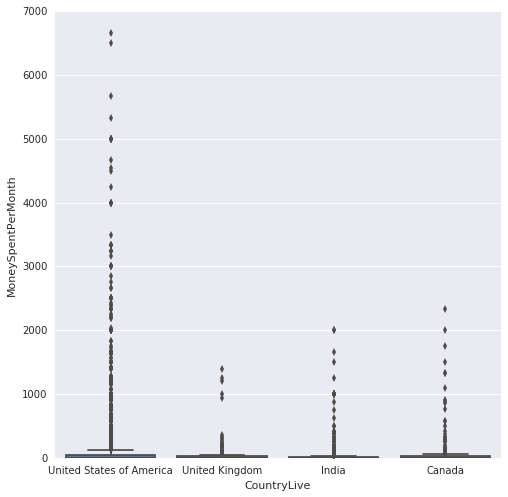

In [32]:
box_plot = survey_clean[survey_clean['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="CountryLive", y="MoneySpentPerMonth", data=box_plot)


## Choosing the Two Best Markets

Based on the recomputed mean for each countries, we should definitely target our advertisement in the USA. There are a lot of new coders based in USA and willing to pay decent amount of money per month for their learning. 

The other country we should consider is Canada although India has higher total of respondents wanting to learn programming. However, the spending power of respondents in Canada are better then the respondents in Indian especially considering the differences of currencies. We should bear in mind that the potential in India is also worth considering before the final decision as the total of respondents are just above twice as much as in Canada.

Another possible solution is to split our advertisement campaign into three markets instead of two. Maybe we could invest 60% of our resources in USA , 20% each for India and Canada. If our company has a marketing team then at this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analysing the new survey data.

## Conclusion

We analysed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't an easy decision to decide on which one to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision or they could collect more data for the data analytics team to investigate further.